In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math

In [2]:
path = r'D:\back up\Downloads\RoadLaneTestImage.jpg'

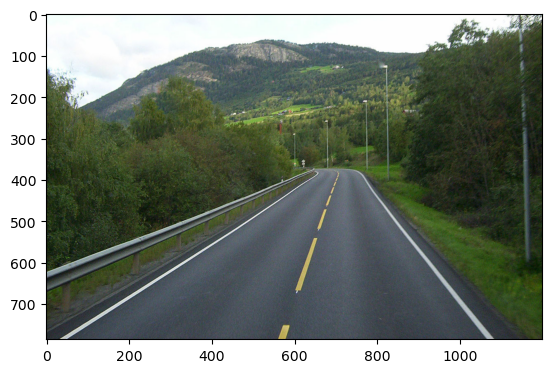

In [3]:
image = mpimg.imread(path)
plt.imshow(image)
plt.show()

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

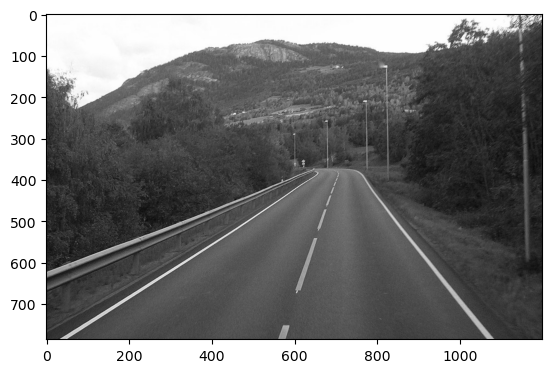

In [5]:
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

In [6]:
kernel_size = 7
blur_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

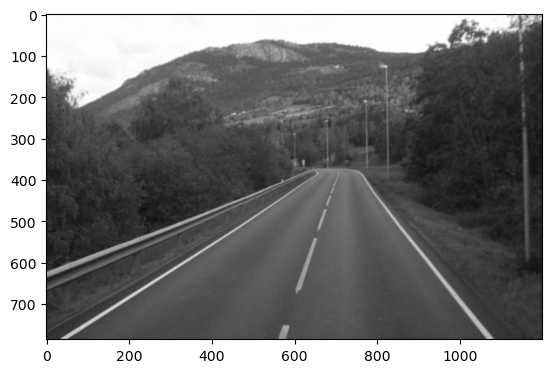

In [7]:
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))

In [8]:
low_t = 50
high_t = 200
aperture_size = 8 
L2Gradient = True

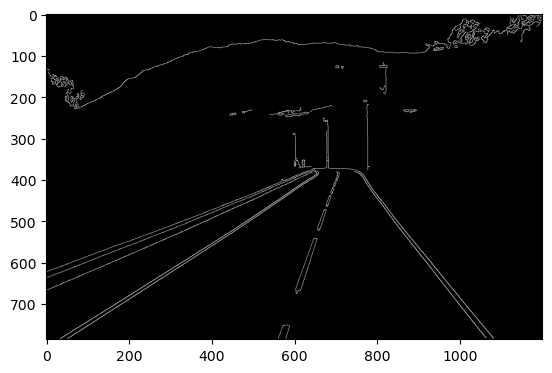

In [9]:
edge1 = cv2.Canny(blur_image,low_t, high_t)
##plt.imshow(edge1)
plt.imshow(cv2.cvtColor(edge1, cv2.COLOR_BGR2RGB))

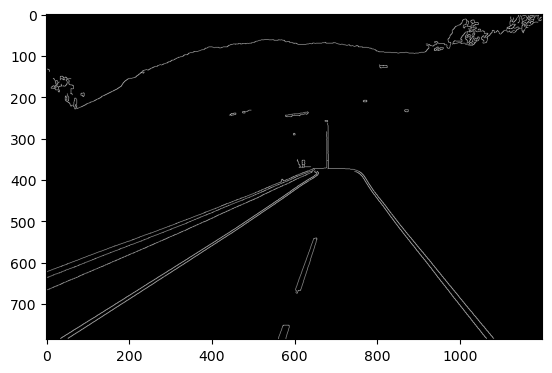

In [10]:
edge3 = cv2.Canny(blur_image, low_t, high_t, L2gradient = L2Gradient )
plt.imshow(cv2.cvtColor(edge3, cv2.COLOR_BGR2RGB))

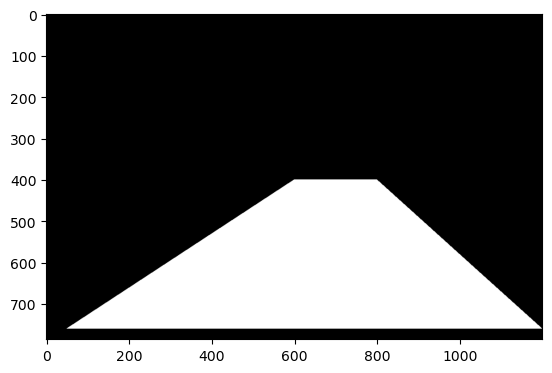

In [11]:
vertices = np.array([ [1200,760],[50,760],[600,400], [800,400]])
mask = np.zeros_like(edge3)
cv2.fillPoly(mask, pts = [vertices], color =(255,255,255))
masked_edges2 = cv2.bitwise_and(edge1, mask)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

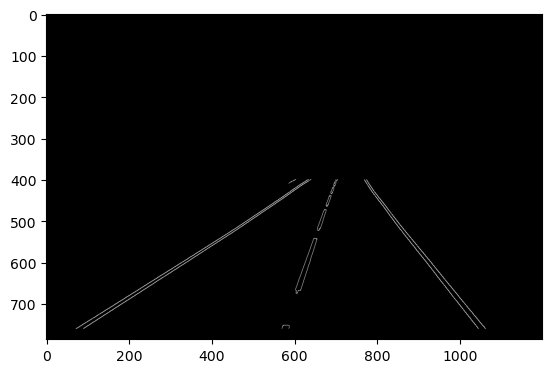

In [12]:
plt.imshow(cv2.cvtColor(masked_edges2, cv2.COLOR_BGR2RGB))

In [13]:
rho = 3
theta = np.pi/180
threshold = 15
min_line_len = 150
max_line_gap = 50

In [14]:
lines = cv2.HoughLines(masked_edges2, 1, np.pi / 180, 170)
print(lines)

[[[ 6.8300000e+02  1.0122910e+00]]

 [[ 6.8800000e+02  9.9483764e-01]]

 [[-3.4600000e+02  2.4609141e+00]]

 [[ 6.8600000e+02  9.7738439e-01]]

 [[-3.5500000e+02  2.4783676e+00]]

 [[ 6.8900000e+02  9.7738439e-01]]

 [[ 7.9400000e+02  3.4906584e-01]]]


In [27]:
k=0
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    pt1 =(x1,y1)
    print(pt1)
    

(-486, 1109)
(-463, 1121)
(-360, -994)
(-445, 1127)
(-335, -1006)
(-443, 1130)
(404, 1211)


In [28]:
cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 3)

array([[[248, 254, 254],
        [248, 254, 254],
        [248, 254, 254],
        ...,
        [242, 245, 250],
        [216, 218, 239],
        [205, 211, 237]],

       [[248, 254, 254],
        [248, 254, 254],
        [248, 254, 254],
        ...,
        [231, 237, 251],
        [204, 218, 229],
        [181, 202, 207]],

       [[246, 255, 254],
        [246, 255, 254],
        [246, 255, 254],
        ...,
        [203, 214, 218],
        [140, 168, 171],
        [112, 149, 155]],

       ...,

       [[ 25,  39,  50],
        [ 38,  46,  57],
        [ 43,  43,  55],
        ...,
        [ 53,  54,  36],
        [ 54,  57,  26],
        [ 56,  61,  20]],

       [[ 54,  41,  51],
        [ 54,  51,  58],
        [ 41,  50,  55],
        ...,
        [ 51,  59,  35],
        [ 56,  62,  36],
        [ 53,  52,  32]],

       [[ 51,  38,  48],
        [ 51,  48,  55],
        [ 39,  48,  53],
        ...,
        [ 55,  63,  39],
        [ 60,  66,  40],
        [ 57,  56,  36]]

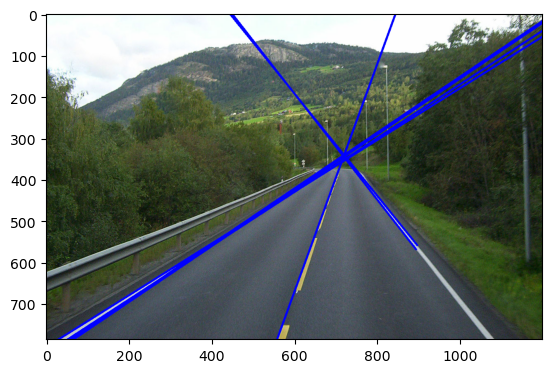

In [29]:
plt.imshow(image)